<a href="https://colab.research.google.com/github/JamesAttwood1910/Diplomado_USACH/blob/main/ClassificationDePobreza_Modulo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos, librerias, y analisis inicial

In [ ]:
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Modulo6/Tarea/CASEN_2017_select.csv", encoding = "ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   folio         216439 non-null  int64  
 1   sexo          216439 non-null  object 
 2   edad          216439 non-null  int64  
 3   ecivil        216439 non-null  object 
 4   o1            175076 non-null  object 
 5   oficio1       92417 non-null   object 
 6   o16           68630 non-null   object 
 7   s12           216439 non-null  object 
 8   ytot          144706 non-null  float64
 9   pobreza       216231 non-null  object 
 10  esc           174058 non-null  float64
 11  educ          216439 non-null  object 
 12  depen         58122 non-null   object 
 13  activ         175076 non-null  object 
 14  indmat        216439 non-null  object 
 15  indsan        216439 non-null  object 
 16  calglobviv    216439 non-null  object 
 17  hacinamiento  216439 non-null  object 
dtypes: f

In [ ]:
df.shape

(216439, 18)

In [ ]:
df.isna().sum()

folio                0
sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot             71733
pobreza            208
esc              42381
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

In [ ]:
df['pobreza'].value_counts()

No pobres             195357
Pobres no extremos     15260
Pobres extremos         5614
Name: pobreza, dtype: int64

Esta tarea se trata de classificar la variable de pobreza. Es un porblema multiclase (1: Pobres extremos, 2: Pobres no extremos, 3: No pobres). 

Al comenzar la base de datos tienen 216439 observaciónes con 18 variables. Como ya mencionado pobreza será la variable dependiente (target) y las otras 17 será variables independientes. 

Primero se nota que hay valores faltantes (missings) en varias de las variables y que la variable dependiente esta desbalanceada con la mayoria de las observaciones classificadas como No pobres.  

Tambien se nota que varias variables son de tipo object y van a requere una transformacion a tipo numerico. 


Las variables independientes son: 


*   folio - numero de identificacion 
*   sexo 
*   edad
*   ecivil - estado civil
*   esc - años de escolaridad
*   educ - nivel educacional alcanzado
*   depen - dependencia administrativa
*   activ - situación laboral
*   indmat - indicador de materialidad
*   indsan - Indicador de sanemiento
*   clagobviv - Calidad de vivienda
*   hacinamiento 
*   s12 - sistema de salud previsional
*   o16 - tipo de contrato
*   o1 - empleado 
*   oficio1 - ocupacion u oficio
*   ytot - ingreso total

# Análisis exploratorio

#### Folio
Primero la variable de folio se remueve ya que es solo un numero de identificación en el modelo. 

In [ ]:
df.drop(['folio'], axis = 1, inplace = True)

#### Edad
En la base de datso hay observaciones para niños y adultos. Los niños representan una gran proporcion de los missings. Por lo tanto, se ha tomado la decision de remover todas las observaciones con una edad menor de 16 años, ya que los factors que determinan el nivel de pobreza para un niño o adulto son diferentes y sería dificil representar ambos de estas situaciones en un modelo. Al remover los niños la base de datos tiene 172150 observaciones. 

In [ ]:
df[df['edad'] < 16].isna().sum()

sexo                0
edad                0
ecivil              0
o1              41363
oficio1         44257
o16             44264
s12                 0
ytot            32037
pobreza             5
esc             41368
educ                0
depen            7652
activ           41363
indmat              0
indsan              0
calglobviv          0
hacinamiento        0
dtype: int64

In [ ]:
df = df[df['edad'] > 15]

In [ ]:
df.shape

(172150, 17)

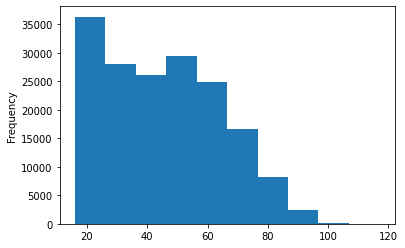

In [ ]:
df['edad'].plot.hist()

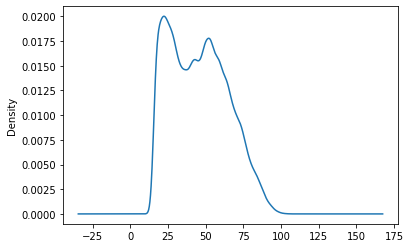

In [ ]:
df['edad'].plot.density()


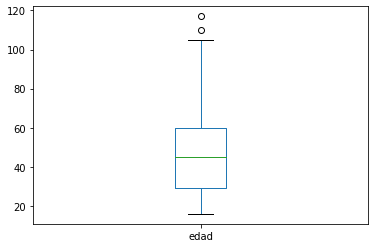

In [ ]:
df['edad'].plot.box()


#### Pobreza (Target variable) 

Pobreza tiene 203 missings. Estas observaciones se guardaran en una base de datos seperada para formar parte del grupo de test mas adelante. Se remueven de df. Ahora df tiene 171947 observaciones. 

Tambien pobreza se transforma a un integer multiordenal. 

In [ ]:
df['pobreza'].isna().sum()

203

In [ ]:
pobreza_missing = df[df['pobreza'].isna()]

In [ ]:
df = df[~df['pobreza'].isna()]

In [ ]:
df.shape

(171947, 17)

In [ ]:
pobreza_dict = { 'Pobres extremos' : 1,
                'Pobres no extremos' : 2,
               'No pobres' : 3}

df['pobreza'] = df.pobreza.map(pobreza_dict)

In [ ]:
df['pobreza'].value_counts()

3    157869
2     10350
1      3728
Name: pobreza, dtype: int64

#### Sexo

No tiene missings. Es una variable binominal y se transforma a int64. 

In [ ]:
df['sexo'].value_counts()

Mujer     91326
Hombre    80621
Name: sexo, dtype: int64

In [ ]:
df['sexo'].isna().sum()

0

In [ ]:
df['sexo'].replace(['Hombre','Mujer'],[0,1], inplace = True)

# Hombre es 0 / Mujer es 1

In [ ]:
df['sexo'].value_counts()

1    91326
0    80621
Name: sexo, dtype: int64

#### Ecivil

Es una variable multi nominal que requiere transformacion. No tiene missings. 

In [ ]:
df['ecivil'].value_counts()

Soltero(a)                                         61693
Casado(a)                                          59590
Conviviente o pareja sin acuerdo de unión civil    27556
Viudo(a)                                           10615
Separado(a)                                         8861
Divorciado (a)                                      3044
Conviviente civil (con acuerdo de unión civil)       366
Anulado(a)                                           222
Name: ecivil, dtype: int64

In [ ]:
df['ecivil'].isna().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ids = le.fit_transform(df.ecivil)
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
mapping 

{'Anulado(a)': 0,
 'Casado(a)': 1,
 'Conviviente civil (con acuerdo de unión civil)': 2,
 'Conviviente o pareja sin acuerdo de unión civil': 3,
 'Divorciado (a)': 4,
 'Separado(a)': 5,
 'Soltero(a)': 6,
 'Viudo(a)': 7}

In [ ]:
df['ecivil'] = le.fit_transform(df.ecivil)

In [ ]:
df['ecivil'].value_counts()

6    61693
1    59590
3    27556
7    10615
5     8861
4     3044
2      366
0      222
Name: ecivil, dtype: int64

#### o1

Esta variable contiene informacion muy parecida a 'activ' con ambas tratandose de la situacion laboral de la persona. Sin embargo, 'o1' solo refiere a si alguien trabajó la semana anterior. 

Es una variable binominal, sin missings, y requiere transformacion a int64.,

Por ahora se va a mantener, pero mas adelante na decision se tomará segun si se mantiene o se remueve. 

In [ ]:
df['o1'].value_counts()

Sí    89128
No    82819
Name: o1, dtype: int64

In [ ]:
df['o1'].isna().sum()

0

In [ ]:
df['o1'].replace(['No','Sí'],[0,1], inplace = True)

In [ ]:
df['o1'].value_counts()

1    89128
0    82819
Name: o1, dtype: int64

#### s12

Esta variable es multi nominal y se trata de la sistema de salud previsional que las personas tienen. 

No tiene missings. Tiene un class de 'No sabe'. Se assume que este class no se transformará a un missing ya que especificamente son observaciones que dicen que no saben, en vez de poner nada como respuesta. 

In [ ]:
df['s12'].value_counts()

Sistema Público FONASA Grupo B          54595
Sistema Público FONASA Grupo A          37307
ISAPRE                                  20456
Sistema Público FONASA Grupo C          19066
Sistema Público FONASA Grupo D          16699
Sistema Público FONASA No sabe grupo     9444
Ninguno (Particular)                     5200
No sabe                                  4034
FF.AA. y de Orden                        3802
Otro sistema                             1344
Name: s12, dtype: int64

In [ ]:
df['s12'].isna().sum()

0

In [ ]:
df['s12'] = le.fit_transform(df.s12)

In [ ]:
df['s12'].value_counts()

6    54595
5    37307
1    20456
7    19066
8    16699
9     9444
2     5200
3     4034
0     3802
4     1344
Name: s12, dtype: int64

#### esc

Es una varibale numerica y cuenta la cantidad de años escolares que una persona cumplió. 

No tiene una distribucion normal ya que en el QQ plot los Quantiles estan alejados de la linea roja. Tambien el Shapiro Wilk test da un valor de P de < 0.05. 

In [ ]:
df['esc'].describe()

count    170947.00000
mean         10.85881
std           4.31995
min           0.00000
25%           8.00000
50%          12.00000
75%          14.00000
max          22.00000
Name: esc, dtype: float64

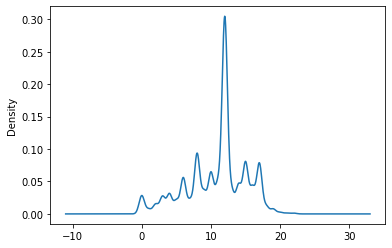

In [ ]:
df['esc'].plot.density()


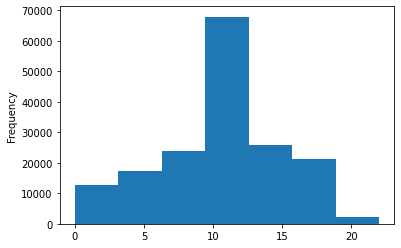

In [ ]:
df['esc'].plot.hist(bins = 7)


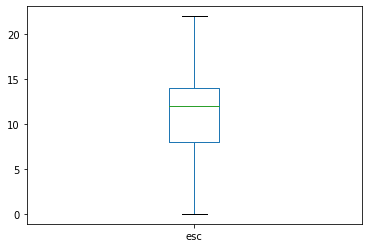

In [ ]:
df['esc'].plot.box() # potenciales valores atipicos

In [ ]:
df['esc'].isna().sum()

1000

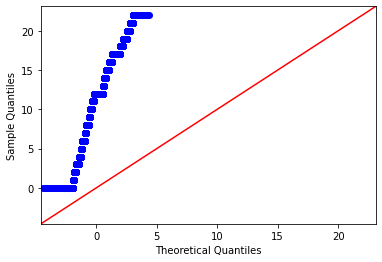

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab


sm.qqplot(df['esc'].dropna(), line='45')
pylab.show()

In [ ]:
from scipy import stats

x = df['esc'].dropna()
shapiro_test = stats.shapiro(x)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9526053071022034, 0.0)

#### Educ 

La class de NS/NR se transforma a un missing dando un total de 1000 missing. Estas observaciones se remueven dando un total de 170947 observaciones en la base de datos. 

Es una varibale multi ordenal y se transforma a tipo numeric. 

In [ ]:
df['educ'].value_counts()

M. Hum. Completa                     39055
Básica Incom.                        23180
M. Hum. Incompleta                   20964
Básica Compl.                        18670
Profesional Completo                 16625
Profesional Incompleto               13134
M. Téc Completa                      12375
Técnico Nivel Superior Completo      10486
Técnico Nivel Superior Incompleta     5424
Sin Educ. Formal                      4680
M. Téc. Prof. Incompleta              4164
Postgrado Completo                    1668
NS/NR                                 1000
Postgrado Incompleto                   522
Name: educ, dtype: int64

In [ ]:
df['educ'].replace(['NS/NR'], np.nan, inplace = True)

In [ ]:
df['educ'].isna().sum()

1000

In [ ]:
Educ_ = {'Sin Educ. Formal' : 1, 'Básica Incom.': 2, 'Básica Compl.':3, 'M. Hum. Incompleta':4, 'M. Téc. Prof. Incompleta':5,
          'M. Hum. Completa' : 6, 'M. Téc Completa' :7, 'Técnico Nivel Superior Incompleta':8, 'Técnico Nivel Superior Completo':9,
         'Profesional Incompleto' :10,  'Postgrado Incompleto' :11, 'Profesional Completo':12, 'Postgrado Completo':13}

In [ ]:
df['educ'] = df.educ.map(Educ_)

In [ ]:
df['educ'].value_counts()

6.0     39055
2.0     23180
4.0     20964
3.0     18670
12.0    16625
10.0    13134
7.0     12375
9.0     10486
8.0      5424
1.0      4680
5.0      4164
13.0     1668
11.0      522
Name: educ, dtype: int64

In [ ]:
df['educ'].isna().sum()

1000

In [ ]:
df.dropna(subset=['esc', 'educ'], axis = 0, inplace = True)

In [ ]:
df.shape

(170947, 17)

#### Depen

Tiene un alta porcentaje de valores faltantes y por tanto la variable se remueve. Ahora la base de datos tiene 170947 observaciones y 16 variables. 

In [ ]:
df['depen'].isna().sum()

149543

In [ ]:
df.drop(['depen'], axis = 1, inplace = True)

In [ ]:
df.shape

(170947, 16)

#### Indmat

Tienen un classes de 'SD/NR' que representa missings. Se remplaza con np.nan. Las 260 observaciones con missings se remueven del modelo. Ahora la base de datos tienen 170687 observaciones. Tambien la variable es multi ordenal y se transforma a numerico. 

In [ ]:
df['indmat'].value_counts()

Vivienda Aceptable        150073
Vivienda Recuperable       20114
Vivienda Irrecuperable       500
SD/NR                        260
Name: indmat, dtype: int64

In [ ]:
df['indmat'].replace(['SD/NR'], np.nan, inplace = True)

In [ ]:
# es una variable multiordenal asi que se transformara con ordenal encoding

indmat_dict = {'Vivienda Irrecuperable' : 1,
               'Vivienda Recuperable' : 2,
               'Vivienda Aceptable' :3}

df['indmat'] = df.indmat.map(indmat_dict)

In [ ]:
df['indmat'].isna().sum()

260

In [ ]:
df = df[~df['indmat'].isna()]

In [ ]:
df.shape  

(170687, 16)

## indsan

Tienen un classes de 'Sin Dato' que representa missings. Se remplaza con np.nan. Las 116 observaciones con missings se remueven del modelo. Ahora la base de datos tienen 170571 observaciones. Tambien la variable es biordenal y se transforma a numerico. 

In [ ]:
df['indsan'].value_counts()

Aceptable      155646
Deficitario     14925
Sin Dato          116
Name: indsan, dtype: int64

In [ ]:
df['indsan'].replace(['Sin Dato'], np.nan, inplace = True)

In [ ]:
df['indsan'].isna().sum()

116

In [ ]:
indsan_dict = {'Deficitario' : 1,
               'Aceptable' : 2}

df['indsan'] = df.indsan.map(indsan_dict)

In [ ]:
df = df[~df['indsan'].isna()]

In [ ]:
df.shape

(170571, 16)

## calglobviv

Tienen un classes de 'Sin dato' que representa missings. Se remplaza con np.nan. Las 18 observaciones con missings se remueven del modelo. Ahora la base de datos tienen 170553 observaciones. Tambien la variable es multiordenal y se transforma a numerico. 

In [ ]:
df['calglobviv'].value_counts()


Aceptable        143343
Recuperable       25945
Irrecuperable      1265
Sin dato             18
Name: calglobviv, dtype: int64

In [ ]:
# se va a remover 'sin dato'

df['calglobviv'].replace(['Sin dato'], np.nan, inplace = True)

In [ ]:
df['calglobviv'].isna().sum()

18

In [ ]:
# es una variable multiordenal. transformarla a int64

calglobviv_ = { 'Irrecuperable' : 1,
               'Recuperable' : 2,
               'Aceptable': 3}

df['calglobviv'] = df.calglobviv.map(calglobviv_)

In [ ]:
df = df[~df['calglobviv'].isna()]

In [ ]:
df.shape 

(170553, 16)

## hacinamiento

Tienen un classes de 'NS/NR' que representa missings. Se remplaza con np.nan. Las 418 observaciones con missings se remueven del modelo. Ahora la base de datos tienen 170147 observaciones. Tambien la variable es multiordenal y se transforma a numerico. 

In [ ]:
df['hacinamiento'].value_counts()

# es variable multiordenal. Transformarla a int64 

# codificar NS/NR como valor faltante. 

4.0    157998
3.0      9078
2.0      1952
1.0      1119
Name: hacinamiento, dtype: int64

In [ ]:
df['hacinamiento'].replace(['NS/NR'], np.nan, inplace = True)

In [ ]:
hacinamiento_ = {'Hacinamiento crítico (5 y más)' : 1,
               'Hacinamiento medio alto (3,5 a 4,9)' : 2,
               'Hacinamiento medio bajo (2,5 a 3,49)': 3,
               'Sin hacinamiento (2,49 y menos)': 4}

df['hacinamiento'] = df.hacinamiento.map(hacinamiento_)

In [ ]:
df = df[~df['hacinamiento'].isna()]

In [ ]:
df.shape

(170147, 16)

## activ

Es una variable multi ordenal y se requiere transformacion a numeric. No tiene missings

In [ ]:
df['activ'].value_counts() 

Ocupados       91203
Inactivos      71239
Desocupados     7705
Name: activ, dtype: int64

In [ ]:
df['activ'].isna().sum()

0

In [ ]:
activ_ = {'Ocupados':3,'Inactivos':2, 'Desocupados':1 }

df['activ'] = df.activ.map(activ_)

In [ ]:
df['activ'].value_counts() 

3    91203
2    71239
1     7705
Name: activ, dtype: int64

#### oficio1 

Esta variable se trata de que tipo de trabajo una persona tiene y tiene una alta cantidad de missings. Es probable que la mayoria de los missings se deben a las personas desocupados y inactivos (niveles 2 y 3) en la variable 'activ'. 

Tambien tiene un class de 'Sin Dato' que se cambia a np.nan. 

In [ ]:
df['oficio1'].isna().sum()

78944

In [ ]:
df['oficio1'].value_counts()

Trabajadores no calificado                                      20777
Trabajadores de los servicios y vendedores de comerci           14025
Oficiales, operarios y artesanos de artes mecánicas y de otr    12831
Profesionales, científicos e intelectuale                       10321
Técnicos profesionales de nivel medi                             8982
Operadores de instalaciones y máquinas y montadore               8095
Empleados de oficina                                             6417
Agricultores y trabajadores calificados agropecuarios y pesq     4743
Miembros del poder ejecutivo y de los cuerpos legislativo        4283
Fuerzas Armada                                                    450
Sin dato                                                          279
Name: oficio1, dtype: int64

In [ ]:
df['oficio1'].replace(['Sin dato'], np.nan, inplace = True)

In [ ]:
df['activ'].value_counts() # 'Ocupados':3,'Inactivos':2, 'Desocupados':1 }

3    91203
2    71239
1     7705
Name: activ, dtype: int64

In [ ]:
71239 + 7705 + 284

79228

In [ ]:
df['Trabajo'] = np.where(df.oficio1.isna(), df.activ, df.oficio1)

In [ ]:
df['Trabajo'].unique()

array(['Trabajadores no calificado',
       'Trabajadores de los servicios y vendedores de comerci', 2, 1,
       'Operadores de instalaciones y máquinas y montadore',
       'Técnicos profesionales de nivel medi', 'Empleados de oficina',
       'Miembros del poder ejecutivo y de los cuerpos legislativo',
       'Profesionales, científicos e intelectuale',
       'Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'Fuerzas Armada',
       'Agricultores y trabajadores calificados agropecuarios y pesq', 3],
      dtype=object)

In [ ]:
df['Trabajo'].value_counts()

2                                                               71239
Trabajadores no calificado                                      20777
Trabajadores de los servicios y vendedores de comerci           14025
Oficiales, operarios y artesanos de artes mecánicas y de otr    12831
Profesionales, científicos e intelectuale                       10321
Técnicos profesionales de nivel medi                             8982
Operadores de instalaciones y máquinas y montadore               8095
1                                                                7705
Empleados de oficina                                             6417
Agricultores y trabajadores calificados agropecuarios y pesq     4743
Miembros del poder ejecutivo y de los cuerpos legislativo        4283
Fuerzas Armada                                                    450
3                                                                 279
Name: Trabajo, dtype: int64

In [ ]:
# los valores de 3 son gente empleada que relmente no ingresaron su tipo de trabjo. Estas observaciones se botan. 
# los valores 2 son gente desocupado. 
# los valores 1 son gente inactivo. 
# es una mezcla de variables ordenales 1,2,3, y nominal datos (tipo de trabjo). Se va a codificar como datos nomianles. 

In [ ]:
df.replace({'Trabajo':{1:'Desocupados', 2:'Inactivos', 3:np.nan}}, inplace = True)

In [ ]:
df['Trabajo'].value_counts()

Inactivos                                                       71239
Trabajadores no calificado                                      20777
Trabajadores de los servicios y vendedores de comerci           14025
Oficiales, operarios y artesanos de artes mecánicas y de otr    12831
Profesionales, científicos e intelectuale                       10321
Técnicos profesionales de nivel medi                             8982
Operadores de instalaciones y máquinas y montadore               8095
Desocupados                                                      7705
Empleados de oficina                                             6417
Agricultores y trabajadores calificados agropecuarios y pesq     4743
Miembros del poder ejecutivo y de los cuerpos legislativo        4283
Fuerzas Armada                                                    450
Name: Trabajo, dtype: int64

In [ ]:
df['Trabajo'].isna().sum()

279

In [ ]:
df.dropna(subset=['Trabajo'], axis = 0, inplace = True)

In [ ]:
df['Trabajo'].isna().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ids = le.fit_transform(df.Trabajo)
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
mapping

{'Agricultores y trabajadores calificados agropecuarios y pesq': 0,
 'Desocupados': 1,
 'Empleados de oficina': 2,
 'Fuerzas Armada': 3,
 'Inactivos': 4,
 'Miembros del poder ejecutivo y de los cuerpos legislativo': 5,
 'Oficiales, operarios y artesanos de artes mecánicas y de otr': 6,
 'Operadores de instalaciones y máquinas y montadore': 7,
 'Profesionales, científicos e intelectuale': 8,
 'Trabajadores de los servicios y vendedores de comerci': 9,
 'Trabajadores no calificado': 10,
 'Técnicos profesionales de nivel medi': 11}

In [ ]:
df['Trabajo'] = le.fit_transform(df['Trabajo'])

In [ ]:
df['Trabajo'].value_counts()

4     71239
10    20777
9     14025
6     12831
8     10321
11     8982
7      8095
1      7705
2      6417
0      4743
5      4283
3       450
Name: Trabajo, dtype: int64

In [ ]:
df.shape

(169868, 17)

#### o16

In [ ]:
df['o16'].value_counts()

Plazo indefinido       46409
Plazo fijo             20855
No sabe/no responde      225
Name: o16, dtype: int64

In [ ]:
df['o16'].isna().sum()

102379

In [ ]:
df['o16'] = df['o16'].fillna(0)

In [ ]:
df['o16'] = df.apply(lambda df: df['Trabajo'] if df['o16']== 0 else df['o16'], axis=1)

In [ ]:
df['o16'].value_counts()

4                      71239
Plazo indefinido       46409
Plazo fijo             20855
1                       7705
6                       5063
9                       4093
5                       3408
10                      3222
0                       2962
7                       1839
11                      1339
8                       1289
No sabe/no responde      225
2                        218
3                          2
Name: o16, dtype: int64

In [ ]:
df['o16'].replace(['No sabe/no responde'], np.nan, inplace = True)

In [ ]:
df.o16 = np.where(df.o16.isin([0,2,3,5,6,7,8,9,10,11]), np.nan, df.o16)

In [ ]:
{'Agricultores y trabajadores calificados agropecuarios y pesq': 0,
 'Desocupados': 1,
 'Empleados de oficina': 2,
 'Fuerzas Armada': 3,
 'Inactivos': 4,
 'Miembros del poder ejecutivo y de los cuerpos legislativo': 5,
 'Oficiales, operarios y artesanos de artes mecánicas y de otr': 6,
 'Operadores de instalaciones y máquinas y montadore': 7,
 'Profesionales, científicos e intelectuale': 8,
 'Trabajadores de los servicios y vendedores de comerci': 9,
 'Trabajadores no calificado': 10,
 'Técnicos profesionales de nivel medi': 11}

In [ ]:
df['o16'].value_counts() # multiordenal 

4                   71239
Plazo indefinido    46409
Plazo fijo          20855
1                    7705
Name: o16, dtype: int64

In [ ]:
df.o16.isna().sum()

23660

In [ ]:
o16_dict = {'Plazo indefinido' : 1,
               'Plazo fijo' : 2,
            4: 3,  # inactivos
            1: 4} # desocupado

df['o16'] = df.o16.map(o16_dict)

In [ ]:
df['o16'].value_counts() # multiordenal 

3.0    71239
1.0    46409
2.0    20855
4.0     7705
Name: o16, dtype: int64

In [ ]:
df.drop(['oficio1', 'activ'], axis = 1, inplace = True)

#### ytot

In [ ]:
df[df['ytot'].isna()]['o16'].value_counts()

o16_dict = {'Plazo indefinido' : 1,
               'Plazo fijo' : 2,
            4: 3,  # inactivos
            1: 4} # desocupado

In [ ]:
df['ytot'] = np.where(df['ytot'].isna(), 'none', df.ytot)

In [ ]:
df['ytot_copy'] = df.apply(lambda df: df['o16'] if df['ytot'] == 'none' else df['ytot'], axis = 1)

In [ ]:
df[df['ytot_copy'].isin([1,2,3,4])]   # dejar 3 y 4 como inactivos y desocupados # poner 1 y 2 como nan

,sexo,edad,ecivil,o1,o16,s12,ytot,pobreza,esc,educ,indmat,indsan,calglobviv,hacinamiento,Trabajo,ytot_new,ytot_copy
5,1,26,1,0,3.0,6,none,3,15.0,9.0,3.0,1.0,2.0,4.0,4,NaN,3
18,1,33,3,0,3.0,4,none,3,16.0,10.0,3.0,2.0,3.0,4.0,4,NaN,3
20,1,66,7,0,3.0,0,none,3,14.0,10.0,3.0,2.0,3.0,4.0,4,NaN,3
23,1,16,6,0,3.0,0,none,3,11.0,4.0,3.0,2.0,3.0,4.0,4,NaN,3
28,0,22,6,0,3.0,6,none,3,16.0,10.0,3.0,2.0,3.0,4.0,4,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216373,1,60,7,0,3.0,2,none,3,12.0,6.0,1.0,2.0,1.0,4.0,4,NaN,3
216390,1,38,6,0,3.0,2,none,2,12.0,6.0,2.0,1.0,2.0,4.0,4,NaN,3
216400,1,90,7,0,3.0,5,none,1,0.0,1.0,2.0,1.0,2.0,4.0,4,NaN,3
216409,1,42,6,0,3.0,5,none,3,0.0,1.0,1.0,1.0,1.0,4.0,4,NaN,3


In [ ]:
df['ytot_copy'] = np.where(df['ytot_copy'].isin([1,2]), np.nan, df['ytot_copy'])

In [ ]:
df['ytot_copy'].isna().sum()

5253

In [ ]:
df['ytot_copy'] = np.where(df['ytot_copy'].isin([3,4]), 0, df['ytot_copy'])

In [ ]:
df.drop(['ytot'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169868 entries, 0 to 216438
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sexo          169868 non-null  int64  
 1   edad          169868 non-null  int64  
 2   ecivil        169868 non-null  int64  
 3   o1            169868 non-null  int64  
 4   o16           146208 non-null  float64
 5   s12           169868 non-null  int64  
 6   ytot          169868 non-null  object 
 7   pobreza       169868 non-null  int64  
 8   esc           169868 non-null  float64
 9   educ          169868 non-null  float64
 10  indmat        169868 non-null  float64
 11  indsan        169868 non-null  float64
 12  calglobviv    169868 non-null  float64
 13  hacinamiento  169868 non-null  float64
 14  Trabajo       169868 non-null  int64  
 15  ytot_copy     164615 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 22.0+ MB


Ahora tenemos la base de datos preparada. Aun quedan missings en ytot_copy y o16. En el processo de modelamiento ahora, primero las observaciones con missings se van a botar ya que representan un porcentaje bajo de la base de datos. Mas adelante se podría ver si los resultados del modelo se pueden mejorar con el uso de la media o mediana para remplazarlas, o con un modelo para predecirlas. 

In [ ]:
df.dropna()

,sexo,edad,ecivil,o1,o16,s12,ytot,pobreza,esc,educ,indmat,indsan,calglobviv,hacinamiento,Trabajo,ytot_copy
1,1,21,6,1,2.0,2,211091.0,3,7.0,2.0,3.0,2.0,3.0,4.0,10,211091.0
2,0,24,3,1,2.0,3,281750.0,3,12.0,6.0,3.0,2.0,3.0,4.0,9,281750.0
3,0,28,3,1,2.0,3,311750.0,3,12.0,6.0,3.0,2.0,3.0,4.0,9,311750.0
4,0,26,1,0,1.0,6,341667.0,3,15.0,9.0,3.0,1.0,2.0,4.0,10,341667.0
5,1,26,1,0,3.0,6,none,3,15.0,9.0,3.0,1.0,2.0,4.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216431,1,67,1,0,3.0,6,130000.0,3,8.0,4.0,3.0,1.0,2.0,4.0,4,130000.0
216432,0,43,6,0,3.0,3,1500000.0,3,17.0,12.0,3.0,1.0,2.0,4.0,4,1500000.0
216433,0,78,5,0,3.0,5,94932.0,2,1.0,2.0,2.0,1.0,1.0,4.0,4,94932.0
216434,1,64,1,0,3.0,5,104646.0,3,3.0,2.0,2.0,1.0,2.0,4.0,4,104646.0


In [ ]:
df.to_csv('/content/drive/MyDrive/Modulo6/Tarea/df_ready.csv') 

# Modelamiento

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Modulo6/Tarea/df_ready.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169868 entries, 0 to 169867
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    169868 non-null  int64  
 1   sexo          169868 non-null  int64  
 2   edad          169868 non-null  int64  
 3   ecivil        169868 non-null  int64  
 4   o1            169868 non-null  int64  
 5   o16           146208 non-null  float64
 6   s12           169868 non-null  int64  
 7   pobreza       169868 non-null  int64  
 8   esc           169868 non-null  float64
 9   educ          169868 non-null  float64
 10  indmat        169868 non-null  float64
 11  indsan        169868 non-null  float64
 12  calglobviv    169868 non-null  float64
 13  hacinamiento  169868 non-null  float64
 14  Trabajo       169868 non-null  int64  
 15  ytot_copy     164615 non-null  float64
dtypes: float64(8), int64(8)
memory usage: 20.7 MB


In [ ]:
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.shape

(142572, 15)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142572 entries, 1 to 169865
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sexo          142572 non-null  int64  
 1   edad          142572 non-null  int64  
 2   ecivil        142572 non-null  int64  
 3   o1            142572 non-null  int64  
 4   o16           142572 non-null  float64
 5   s12           142572 non-null  int64  
 6   pobreza       142572 non-null  int64  
 7   esc           142572 non-null  float64
 8   educ          142572 non-null  float64
 9   indmat        142572 non-null  float64
 10  indsan        142572 non-null  float64
 11  calglobviv    142572 non-null  float64
 12  hacinamiento  142572 non-null  float64
 13  Trabajo       142572 non-null  int64  
 14  ytot_copy     142572 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 17.4 MB


In [ ]:
df2.corr()

,sexo,edad,ecivil,o1,o16,s12,pobreza,esc,educ,indmat,indsan,calglobviv,hacinamiento,Trabajo,ytot_copy
sexo,1.00000,0.06653,0.04513,-0.22913,0.18672,0.02719,-0.02247,-0.02646,-0.01860,0.01175,0.00516,0.01231,-0.00268,-0.08936,-0.14697
edad,0.06653,1.00000,-0.27836,-0.16418,0.10013,0.04316,0.07506,-0.45525,-0.37264,-0.01379,-0.02958,-0.01657,0.10641,-0.08095,0.03896
ecivil,0.04513,-0.27836,1.00000,-0.11150,0.13959,0.01240,-0.03486,0.03663,0.05299,-0.03263,0.00340,-0.02026,0.01681,-0.07542,-0.11863
o1,-0.22913,-0.16418,-0.11150,1.00000,-0.89376,0.05227,0.14283,0.25725,0.22848,0.01476,0.04340,0.03225,-0.01803,0.69472,0.37182
o16,0.18672,0.10013,0.13959,-0.89376,1.00000,-0.03414,-0.16190,-0.24436,-0.22448,-0.03392,-0.05468,-0.05214,0.00207,-0.69668,-0.38858
s12,0.02719,0.04316,0.01240,0.05227,-0.03414,1.00000,-0.00126,-0.19001,-0.22984,-0.04359,-0.01916,-0.03964,-0.03495,0.03418,-0.19638
pobreza,-0.02247,0.07506,-0.03486,0.14283,-0.16190,-0.00126,1.00000,0.08970,0.10381,0.07536,0.11512,0.11631,0.09156,0.11360,0.11176
esc,-0.02646,-0.45525,0.03663,0.25725,-0.24436,-0.19001,0.08970,1.00000,0.92509,0.12585,0.16831,0.18740,0.02464,0.16216,0.27564
educ,-0.01860,-0.37264,0.05299,0.22848,-0.22448,-0.22984,0.10381,0.92509,1.00000,0.12827,0.15615,0.18167,0.04855,0.14986,0.31340
indmat,0.01175,-0.01379,-0.03263,0.01476,-0.03392,-0.04359,0.07536,0.12585,0.12827,1.00000,0.12127,0.60431,0.09702,0.00493,0.05694


Al analizar las correlaciones:

Voy a botar o1 ya que repite la informacion en Trabajo (correlacion 0.69)  
Voy a botar educ ya que repite esc (correlacion 0.92)  
Voy a mantener o16 a pesar de su correlacion con Trabajo (-0.69) ya que da nueva informacion sobre tipo de contrato.   

## Crear grupos de train, test, y validation

Se van a crear tres grupos (train, validation, y test). Todos los modelos se entrenarán con el grupo de train, y se evaluarán con el grupo de validation. Tambien se utilizará Cross Validation (stratified k fold) con el grupo de train con GridSearchCv para tune los parametros de los modelos. Estos modelos tambien se evaluarán con el grupo de validation. Al final el mejor modelo se eligirá y se ensayará con el grupo de test. 

In [ ]:
y = df2['pobreza']
x = df2.drop(['pobreza', 'o1', 'educ'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 1, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106929, 12)
(35643, 12)
(106929,)
(35643,)


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,test_size=0.15, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(90889, 12)
(16040, 12)
(90889,)
(16040,)


Ahora hay un grupo de train (90889 observaciones), validation (16040 observaciones) and test (35643 observaciones)

A continuación se usa StandardScaler para scale las variables continuous. 

In [ ]:
# X_train_scaler

from sklearn.preprocessing import StandardScaler
  
object_ = StandardScaler()
  
# Splitting the independent and dependent variables
i_data = X_train[['esc', 'edad', 'ytot_copy']]
  
# standardization 
scale = object_.fit_transform(i_data) 
scales = pd.DataFrame(scale)

X_train = pd.concat([X_train.reset_index(), scales], axis =1).drop(['index', 'edad', 'esc', 'ytot_copy'], axis =1)


# X_validation_scaler

from sklearn.preprocessing import StandardScaler
  
object_ = StandardScaler()
  
# Splitting the independent and dependent variables
i_data = X_validation[['esc', 'edad', 'ytot_copy']]
  
# standardization 
scale = object_.fit_transform(i_data) 
scales = pd.DataFrame(scale)

X_validation = pd.concat([X_validation.reset_index(), scales], axis =1).drop(['index', 'edad', 'esc', 'ytot_copy'], axis =1)


# X_test_scaler

from sklearn.preprocessing import StandardScaler
  
object_ = StandardScaler()
  
# Splitting the independent and dependent variables
i_data = X_test[['esc', 'edad', 'ytot_copy']]
  
# standardization 
scale = object_.fit_transform(i_data) 
scales = pd.DataFrame(scale)

X_test = pd.concat([X_test.reset_index(), scales], axis =1).drop(['index', 'edad', 'esc', 'ytot_copy'], axis =1)

In [ ]:
X_train.rename(columns={0:'esc', 1:'edad', 2:'ytot_copy'}, inplace=True)
X_validation.rename(columns={0:'esc', 1:'edad', 2:'ytot_copy'}, inplace=True)
X_test.rename(columns={0:'esc', 1:'edad', 2:'ytot_copy'}, inplace=True)

A continuación se usa One hot encoding para crear variables binarias para las variables que originalmente eran categoricas, y que fueron transformadas a numeric multinominales o multiordenales en la etapa de analisis exploratorio. Estas nuevas variables binarias se utilizarán en algunos modelos (KNN, SVM) y en otros modelos se usarán los variables originales (Arbol de decision). Por lo tanto, todas las variables se mantienen en la base de datos por ahora. 

In [ ]:
# One hot encoding

# X_train

ecivil_ = pd.get_dummies(X_train.ecivil, prefix='ecivil_')
o16_ = pd.get_dummies(X_train.o16, prefix='o16_')
s12_ = pd.get_dummies(X_train.s12, prefix='s12_')
indmat_ = pd.get_dummies(X_train.indmat, prefix='indmat_')
indsan_ = pd.get_dummies(X_train.indsan, prefix='indsan_')
calglobviv_ = pd.get_dummies(X_train.calglobviv, prefix='calglobviv_')
hacinamiento_ = pd.get_dummies(X_train.hacinamiento, prefix='hacinamiento_')
Trabajo_ = pd.get_dummies(X_train.Trabajo, prefix='Trabajo_')
X_train_one_hot = pd.concat([X_train, ecivil_, o16_, s12_, indmat_, indsan_, calglobviv_, hacinamiento_, Trabajo_], axis =1)

#X_validation

ecivil_ = pd.get_dummies(X_validation.ecivil, prefix='ecivil_')
o16_ = pd.get_dummies(X_validation.o16, prefix='o16_')
s12_ = pd.get_dummies(X_validation.s12, prefix='s12_')
indmat_ = pd.get_dummies(X_validation.indmat, prefix='indmat_')
indsan_ = pd.get_dummies(X_validation.indsan, prefix='indsan_')
calglobviv_ = pd.get_dummies(X_validation.calglobviv, prefix='calglobviv_')
hacinamiento_ = pd.get_dummies(X_validation.hacinamiento, prefix='hacinamiento_')
Trabajo_ = pd.get_dummies(X_validation.Trabajo, prefix='Trabajo_')
X_validation_one_hot = pd.concat([X_validation, ecivil_, o16_, s12_, indmat_, indsan_, calglobviv_, hacinamiento_, Trabajo_], axis =1)

# X_test 

ecivil_ = pd.get_dummies(X_test.ecivil, prefix='ecivil_')
o16_ = pd.get_dummies(X_test.o16, prefix='o16_')
s12_ = pd.get_dummies(X_test.s12, prefix='s12_')
indmat_ = pd.get_dummies(X_test.indmat, prefix='indmat_')
indsan_ = pd.get_dummies(X_test.indsan, prefix='indsan_')
calglobviv_ = pd.get_dummies(X_test.calglobviv, prefix='calglobviv_')
hacinamiento_ = pd.get_dummies(X_test.hacinamiento, prefix='hacinamiento_')
Trabajo_ = pd.get_dummies(X_test.Trabajo, prefix='Trabajo_')
X_test_one_hot = pd.concat([X_test, ecivil_, o16_, s12_, indmat_, indsan_, calglobviv_, hacinamiento_, Trabajo_], axis =1)

In [ ]:
X_train_one_hot = X_train_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1)
X_validation_one_hot = X_validation_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1)
X_test_one_hot = X_test_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1)


## Modelo 1 - KNN

In [ ]:
# Aqui se usa las bases de datos con one hot encoding. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred = knn_clf.predict(X_validation_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis =1))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_a = confusion_matrix(y_validation, ypred)
result_a

array([[   13,    27,   287],
       [   22,    64,   892],
       [   65,   219, 14451]])

In [ ]:
cm_df_a = pd.DataFrame(result_a,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

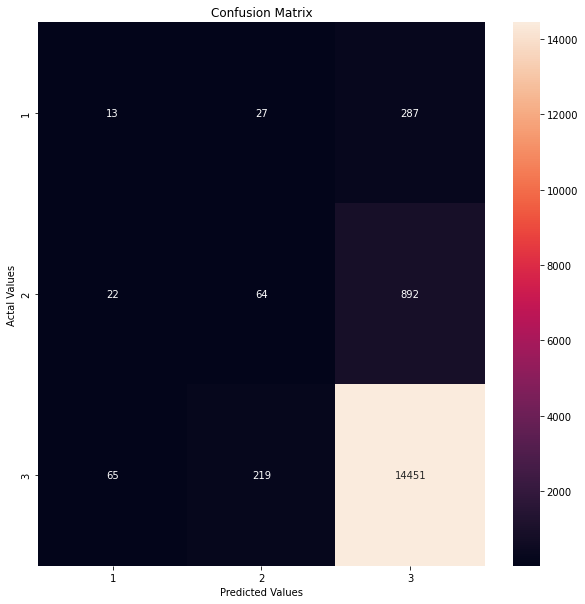

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_a, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result1 = classification_report(y_validation, ypred)
print(result1)

              precision    recall  f1-score   support

           1       0.13      0.04      0.06       327
           2       0.21      0.07      0.10       978
           3       0.92      0.98      0.95     14735

    accuracy                           0.91     16040
   macro avg       0.42      0.36      0.37     16040
weighted avg       0.86      0.91      0.88     16040



## Modelo 2 - Arbol de decision




In [ ]:
# Se usa la base de datos sin one hot encoding

In [ ]:
from sklearn import preprocessing
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth = 10, criterion = 'gini', min_samples_leaf = 2, min_samples_split = 2)
classifier = classifier.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

In [ ]:
import graphviz
# DOT data

features = ['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names =  features,
                                class_names= ['1','2','3'],
                                filled=True,
                                rotate = True)

# Draw graph
fig = plt.figure(figsize=(15,10))
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
ypred2 = classifier.predict(X_validation_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_b = confusion_matrix(y_validation, ypred2)
result_b

array([[    1,     7,   319],
       [    2,    15,   961],
       [   23,   100, 14612]])

In [ ]:
cm_df_b = pd.DataFrame(result_b,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

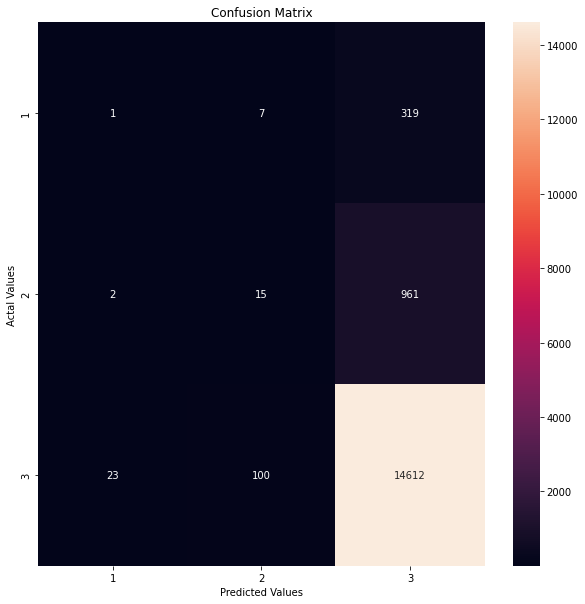

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_b, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result2 = classification_report(y_validation, ypred2)
print(result2)

              precision    recall  f1-score   support

           1       0.04      0.00      0.01       327
           2       0.12      0.02      0.03       978
           3       0.92      0.99      0.95     14735

    accuracy                           0.91     16040
   macro avg       0.36      0.34      0.33     16040
weighted avg       0.85      0.91      0.88     16040



## Modelo 4 - Regression Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred4 = LogReg_clf.predict(X_validation[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']])

In [ ]:
result_d = confusion_matrix(y_validation, y_pred4)
result_d

array([[    0,     5,   322],
       [    0,     7,   971],
       [    0,    16, 14719]])

In [ ]:
cm_df_d = pd.DataFrame(result_d,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

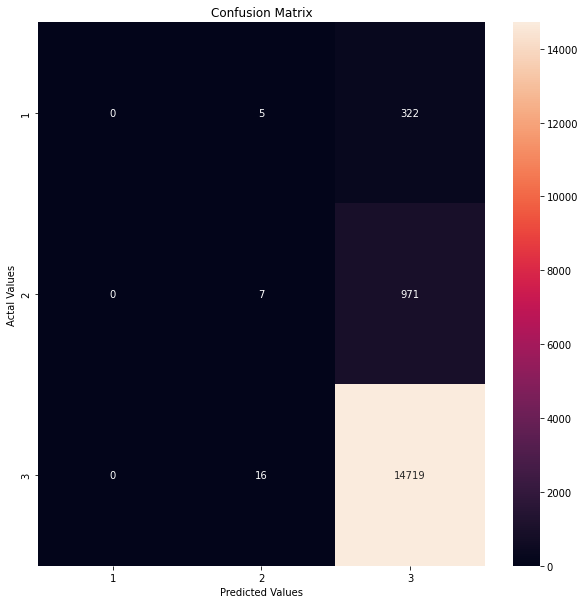

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_d, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result4 = classification_report(y_validation, y_pred4)
print(result4)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       327
           2       0.20      0.01      0.01       978
           3       0.92      1.00      0.96     14735

    accuracy                           0.92     16040
   macro avg       0.37      0.34      0.32     16040
weighted avg       0.86      0.92      0.88     16040



## Modelo 5 - SVM

Este modelo requiere mucha poder compotucional para ejecutarse. Por lo tanto se toma una muestra (stratified) de 10% del grupo de train que se usa para entrenar el modelo. 

In [ ]:
train_one_hot = pd.concat([X_train_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1), y_train.reset_index().drop(['index'],axis =1)], axis =1)

In [ ]:
train_one_hot.head()

,sexo,esc,edad,ytot_copy,ecivil__0,ecivil__1,ecivil__2,ecivil__3,ecivil__4,ecivil__5,ecivil__6,ecivil__7,o16__1.0,o16__2.0,o16__3.0,o16__4.0,s12__0,s12__1,s12__2,s12__3,s12__4,s12__5,s12__6,s12__7,s12__8,s12__9,indmat__1.0,indmat__2.0,indmat__3.0,indsan__1.0,indsan__2.0,calglobviv__1.0,calglobviv__2.0,calglobviv__3.0,hacinamiento__1.0,hacinamiento__2.0,hacinamiento__3.0,hacinamiento__4.0,Trabajo__0,Trabajo__1,Trabajo__2,Trabajo__3,Trabajo__4,Trabajo__5,Trabajo__6,Trabajo__7,Trabajo__8,Trabajo__9,Trabajo__10,Trabajo__11,pobreza
0,0,0.27388,-1.32119,-0.06598,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3
1,1,0.27388,-0.16016,0.21198,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3
2,1,1.87478,0.44559,0.63243,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3
3,0,0.95998,-1.16975,-0.48290,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,3
4,1,1.87478,-0.56400,2.18522,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3


In [ ]:
stratified_sample, _ = train_test_split(train_one_hot, test_size=0.9, stratify=train_one_hot['pobreza'])

In [ ]:
stratified_sample.shape

(9088, 51)

In [ ]:
stratified_sample['pobreza'].value_counts()

3    8339
2     556
1     193
Name: pobreza, dtype: int64

In [ ]:
stratified_sample_x = stratified_sample.drop(['pobreza'], axis =1)
stratified_sample_y = stratified_sample['pobreza']

In [ ]:
from sklearn import svm
linear=svm.SVC(kernel="linear", C=1)
linear.fit(stratified_sample_x,stratified_sample_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ypred_5 = linear.predict(X_validation_one_hot.drop(['ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv', 'hacinamiento', 'Trabajo'], axis = 1))

In [ ]:
results_e = confusion_matrix(y_validation, ypred_5)
results_e

array([[    0,     0,   327],
       [    0,     0,   978],
       [    0,     0, 14735]])

In [ ]:
cm_df_e = pd.DataFrame(results_e,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

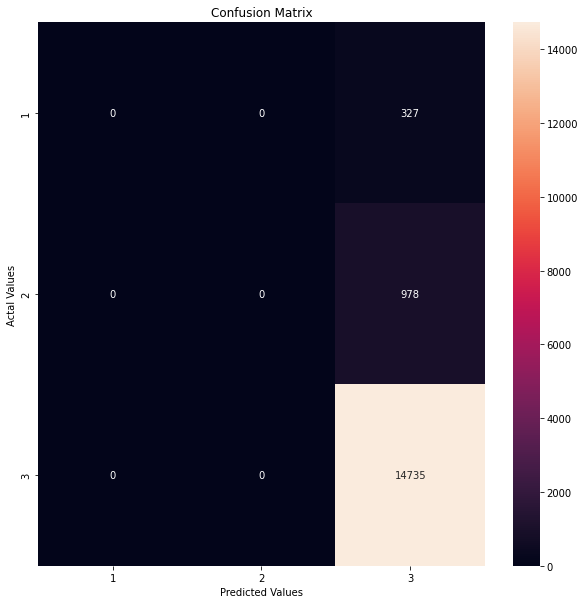

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_e, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result5 = classification_report(y_validation, ypred_5)
print(result5)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       327
           2       0.00      0.00      0.00       978
           3       0.92      1.00      0.96     14735

    accuracy                           0.92     16040
   macro avg       0.31      0.33      0.32     16040
weighted avg       0.84      0.92      0.88     16040



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Primeros concluciones

Ninguno de los primeros 4 modelos (KNN, Arbol de decision, Regresion Logistica, o SVM) tuvo un buen desempeno cuando se ensayó con el grupo de validation. Sin embargo, el mejor modelo fue KNN que classificó grupo 2 con precision 0.21, y recall 0.07, y classificó grupo 1 con precision 0.13 y recall 0.04. A todos los otros modelos les costó classificar grupos 1 y 2, con casi todas las observaciones classificadas como grupo 3. La razon por esto es que la base de datos esta muy desbalanceada a favor del grupo 3. 

A continuación se realizará hypertuning para identificar las mejores parametros para los modelos de KNN, Arbol de Decision, y SVM

In [ ]:
# resultados del KNN modelo

result1 = classification_report(y_validation, ypred)
print(result1)

              precision    recall  f1-score   support

           1       0.13      0.04      0.06       327
           2       0.21      0.07      0.10       978
           3       0.92      0.98      0.95     14735

    accuracy                           0.91     16040
   macro avg       0.42      0.36      0.37     16040
weighted avg       0.86      0.91      0.88     16040



# Hypertuning

### Arbol de decision - Hypertuning

En este modelo se usa un GridSearch para identificar la mejor combinacion de max_leaf_node, y min_samples_leaf. El metodo de socring es 'f1 marco' para dar una idea de como el modelo se desempeña para los tres clases (1,2,3) en sentido de precission y recall. Tambien se usa StratifiedKFold para mantener la distribucion de los tres clases. Idealmente n_splits aumentaría a 5 / 10 pero en esta ocassión se colocó 2 para reducir el tiempo requerido para entrenar el modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_leaf': [1,2,3,4,5], }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, refit = True, verbose=3, cv=skf, scoring = 'f1_macro')

In [ ]:
grid_search_cv.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

Fitting 2 folds for each of 490 candidates, totalling 980 fits
[CV] max_leaf_nodes=2, min_samples_leaf=1 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=1, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=1 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=1, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=2 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=2, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=2 ............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV]  max_leaf_nodes=2, min_samples_leaf=2, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=3 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=3, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=3 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=3, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=4 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=4, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=4 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=4, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=5 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=5, score=0.319, total=   0.1s
[CV] max_leaf_nodes=2, min_samples_leaf=5 ............................
[CV]  max_leaf_nodes=2, min_samples_leaf=5, score=0.319, total=   0.1s
[CV] max_leaf_nodes=3, min_samples_leaf=1 ............................
[CV] 

[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
           

In [ ]:
grid_search_cv.best_params_

{'max_leaf_nodes': 99, 'min_samples_leaf': 5}

In [ ]:
grid_search_cv.best_score_

0.3344635079521461

Un nuevo GridSearch se ejecuta con max_leaf_nodes aumentado a un maximo de 120. Min_samples_split tambien se agrega. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

params = {'max_leaf_nodes': list(range(90, 120)), 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [3,5,7] }
grid_search_cv2 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, refit = True, verbose=3, cv=skf, scoring = 'f1_macro')


In [ ]:
grid_search_cv2.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

Fitting 2 folds for each of 450 candidates, totalling 900 fits
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=3 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=3, score=0.326, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=3 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=3, score=0.329, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=5 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=5, score=0.326, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=5 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=5, score=0.329, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=7 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=7, score=0.326, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=7 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=1, min_samples_split=7, score=0.330, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=3 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=3, score=0.326, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=3 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=3, score=0.329, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=5 ......
[CV]  max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=5, score=0.326, total=   0.1s
[CV] max_leaf_nodes=90, min_samples_leaf=2, min_samples_split=5 ......
[CV]  max_leaf_n

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='...
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

Un nuevo GridSearch se realiza con max_depth replazanado max_leaf_nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

params = {'max_depth': list(range(5, 15)), 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [3,5,7,10,15] }
grid_search_cv3 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, refit = True, verbose=3, cv=skf, scoring = 'f1_macro')


In [ ]:
grid_search_cv3.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

Fitting 2 folds for each of 250 candidates, totalling 500 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.319, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.320, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, score=0.319, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, score=0.320, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=7 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.319, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=7 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=7, score=0.320, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, score=0.319, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, score=0.320, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, score=0.319, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_sample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
           

In [ ]:
grid_search_cv3.best_params_

{'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 10}

In [ ]:
grid_search_cv3.best_score_

0.3713873993044742

Se nota que mientras max_depth aumenta el best_score tambien aumenta.

Por lo tanto, un GridSearchCv se realiza de nuevo pero esta vez con el max depth aumentado a un maximo valor de 50. Se remueven min_samples_leaf y min_samples_split ya que no parecen que van a mejorar el best_score. Sus valores del best_params del ultimo GridSearch (cv3) se usarán en el modelo ('min_samples_leaf': 3, 'min_samples_split': 10}). 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

params = {'max_depth': list(range(5, 50))}
grid_search_cv4 = GridSearchCV(DecisionTreeClassifier(random_state=42, min_samples_leaf=3, min_samples_split=10), params, refit = True, verbose=3, cv=skf, scoring = 'f1_macro')


In [ ]:
grid_search_cv4.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.319, total=   0.1s
[CV] max_depth=5 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... max_depth=5, score=0.320, total=   0.1s
[CV] max_depth=6 .....................................................
[CV] ......................... max_depth=6, score=0.319, total=   0.1s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=6, score=0.320, total=   0.1s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.321, total=   0.1s
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.320, total=   0.1s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.330, total=   0.1s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.325, total=   0.1s
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.336, total=   0.1s
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.332, total=   0.1s
[CV] max_depth=10 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   16.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
          

Esta vez el score aumenta a 0.391 con un max depth de 49. Sin embargo, para el modelo se eligerá un max depth de 20 ya que alli se alcanza un score de 0.39, con mas depth no requerido. Mas depth cuando no sea necesario puede causar overfiting. 


In [ ]:
grid_search_cv4.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=31, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# el best_estimator se usa pero con max_depth cambiado a 20. 

arbol_classifier = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
arbol_classifier = arbol_classifier.fit(X_train_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']], y_train)

In [ ]:
ypred7 = arbol_classifier.predict(X_validation_one_hot[['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_g = confusion_matrix(y_validation, ypred7)
result_g

array([[   16,    25,   286],
       [   33,    87,   858],
       [  144,   483, 14108]])

In [ ]:
cm_df_g = pd.DataFrame(result_g,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

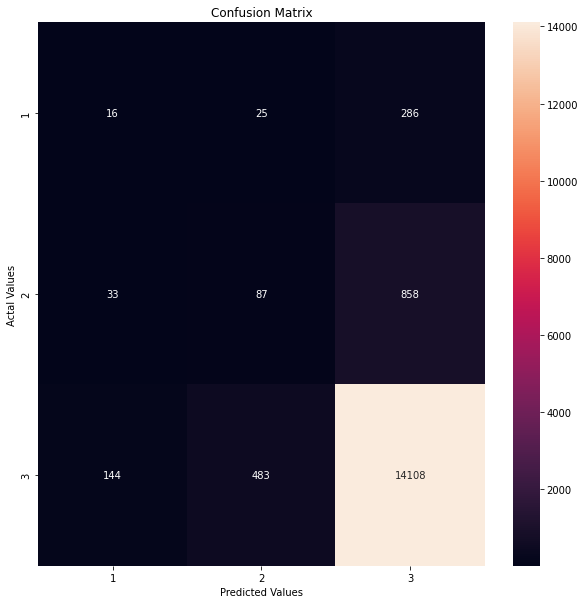

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_g, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Modelo con hypertunning de parametros

result7 = classification_report(y_validation, ypred7)
print(result7)

              precision    recall  f1-score   support

           1       0.08      0.05      0.06       327
           2       0.15      0.09      0.11       978
           3       0.92      0.96      0.94     14735

    accuracy                           0.89     16040
   macro avg       0.38      0.37      0.37     16040
weighted avg       0.86      0.89      0.87     16040



In [ ]:
# Modelo original sin hypertunning

result2 = classification_report(y_validation, ypred2)
print(result2)

              precision    recall  f1-score   support

           1       0.04      0.00      0.01       327
           2       0.12      0.02      0.03       978
           3       0.92      0.99      0.95     14735

    accuracy                           0.91     16040
   macro avg       0.36      0.34      0.33     16040
weighted avg       0.85      0.91      0.88     16040



Al realizar hypertunning de los parametros el modelo de Arbol de decision aun tienen mal desempeño pero se ha mejorado con aumentó en precision y recall para clases 1 y 2. 

Con este modelo podemos ver la importancia de los features (variables independients). En el grafico de abajo se expone que las varibales de ytot_copy, edad, y esc son las mas importantes. Tambien Ecivil y S12 tienen una importancia de > 0.05. 

Por lo tanto, a continuacion se entrenará el mismo modelo pero solo con estas 5 variables (ytot_copy, edad, esc, ecivil, y S12) con la esperanza de que el rendimiento del modelo sea igual, y se puedan remover las otras 7 variables. Esto guardaría espacio compotucional. 

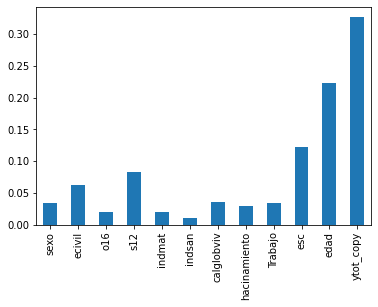

In [ ]:
pd.Series(arbol_classifier.feature_importances_, index=['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']).plot(kind = 'bar')

In [ ]:
arbol_classifier2 = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
arbol_classifier2 = arbol_classifier2.fit(X_train_one_hot[['ecivil', 's12', 'esc', 'edad', 'ytot_copy']], y_train)

In [ ]:
import graphviz
# DOT data

features = ['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy']

dot_data = tree.export_graphviz(arbol_classifier, out_file=None,
                                feature_names =  features,
                                class_names= ['1','2','3'],
                                filled=True,
                                rotate = True)

# Draw graph
fig = plt.figure(figsize=(15,10))
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
ypred8 = arbol_classifier2.predict(X_validation_one_hot[[ 'ecivil',  's12', 'esc', 'edad', 'ytot_copy']])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_h = confusion_matrix(y_validation, ypred8)
result_h

array([[   12,    24,   291],
       [   26,    72,   880],
       [  143,   393, 14199]])

In [ ]:
cm_df_h = pd.DataFrame(result_h,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

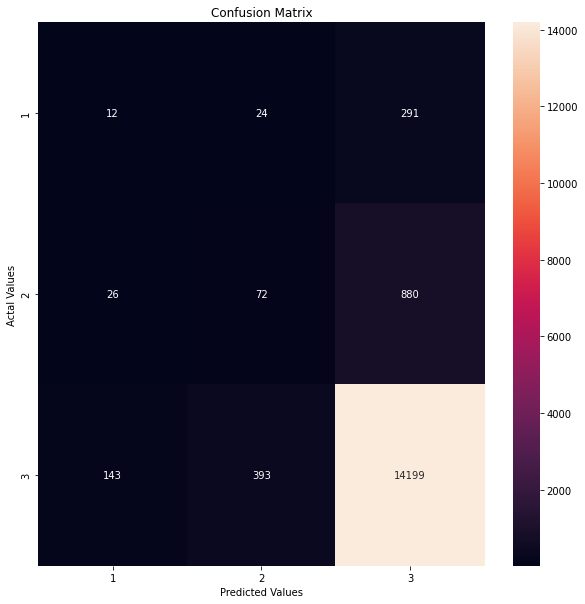

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_h, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result8 = classification_report(y_validation, ypred8)
print(result8)

              precision    recall  f1-score   support

           1       0.07      0.04      0.05       327
           2       0.15      0.07      0.10       978
           3       0.92      0.96      0.94     14735

    accuracy                           0.89     16040
   macro avg       0.38      0.36      0.36     16040
weighted avg       0.86      0.89      0.87     16040



El rendimiento del modelo es parecido al solo usar las variables de (ytot_copy, edad, esc, ecivil, y s12). Si en un momento se necesita guardar espacio compotucional solo estas 5 variables se podría usar, ya que sabemos que dan un resultado muy parecido a un modelo con todas las variables. 

### KNN - Hypertuning

Al haber jugado con los parametros en el modelo de KNN se expuso que se demora en entrenarse Por lo tanto, se entrenará el modelo con solo las 5 variables mas importantes (ytot_copy, edad, esc, ecivil, y s12) y sus variables binarias creada en el one hot encoding. 

In [ ]:
X_train_one_hot.columns

Index(['sexo', 'ecivil', 'o16', 's12', 'indmat', 'indsan', 'calglobviv',
       'hacinamiento', 'Trabajo', 'esc', 'edad', 'ytot_copy', 'ecivil__0',
       'ecivil__1', 'ecivil__2', 'ecivil__3', 'ecivil__4', 'ecivil__5',
       'ecivil__6', 'ecivil__7', 'o16__1.0', 'o16__2.0', 'o16__3.0',
       'o16__4.0', 's12__0', 's12__1', 's12__2', 's12__3', 's12__4', 's12__5',
       's12__6', 's12__7', 's12__8', 's12__9', 'indmat__1.0', 'indmat__2.0',
       'indmat__3.0', 'indsan__1.0', 'indsan__2.0', 'calglobviv__1.0',
       'calglobviv__2.0', 'calglobviv__3.0', 'hacinamiento__1.0',
       'hacinamiento__2.0', 'hacinamiento__3.0', 'hacinamiento__4.0',
       'Trabajo__0', 'Trabajo__1', 'Trabajo__2', 'Trabajo__3', 'Trabajo__4',
       'Trabajo__5', 'Trabajo__6', 'Trabajo__7', 'Trabajo__8', 'Trabajo__9',
       'Trabajo__10', 'Trabajo__11'],
      dtype='object')

In [ ]:
feature_importance_variables = ['ecivil__0','ecivil__1', 'ecivil__2', 'ecivil__3', 'ecivil__4', 'ecivil__5','ecivil__6', 'ecivil__7', 'ytot_copy', 'edad', 'esc',
's12__0', 's12__1', 's12__2', 's12__3', 's12__4', 's12__5',
       's12__6', 's12__7', 's12__8', 's12__9']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = {'n_neighbors': [3,5,7]}

grid = GridSearchCV(knn_clf, param_grid, refit = True, verbose = 3, scoring = 'f1_macro', cv=skf)

In [ ]:
grid.fit(X_train_one_hot[['ecivil__0','ecivil__1', 'ecivil__2', 'ecivil__3', 'ecivil__4', 'ecivil__5','ecivil__6', 'ecivil__7', 'ytot_copy', 'edad', 'esc',
's12__0', 's12__1', 's12__2', 's12__3', 's12__4', 's12__5',
       's12__6', 's12__7', 's12__8', 's12__9']], y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... n_neighbors=10, score=0.337, total=   7.6s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.337, total=   7.6s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.333, total=   7.7s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.330, total=   8.4s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.331, total=   7.4s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.334, total=   7.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [10, 12]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='f1_macro',
             verbose=3)

In [ ]:
grid.best_params_

{'n_neighbors': 10}

In [ ]:
grid.best_score_

0.3353913929889663

In [ ]:
y_val_predict = grid.predict(X_validation_one_hot[['ecivil__0','ecivil__1', 'ecivil__2', 'ecivil__3', 'ecivil__4', 'ecivil__5','ecivil__6', 'ecivil__7', 'ytot_copy', 'edad', 'esc',
's12__0', 's12__1', 's12__2', 's12__3', 's12__4', 's12__5',
       's12__6', 's12__7', 's12__8', 's12__9']])


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result = confusion_matrix(y_validation, y_val_predict)
result

array([[    0,    12,   315],
       [    6,    22,   950],
       [    5,    56, 14674]])

In [ ]:
# Modelo KNN con tunning de parametros

print(classification_report(y_validation, y_val_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       327
           2       0.24      0.02      0.04       978
           3       0.92      1.00      0.96     14735

    accuracy                           0.92     16040
   macro avg       0.39      0.34      0.33     16040
weighted avg       0.86      0.92      0.88     16040



In [ ]:
# Primer modelo KNN sin tunning

result1 = classification_report(y_validation, ypred)
print(result1)

              precision    recall  f1-score   support

           1       0.13      0.04      0.06       327
           2       0.21      0.07      0.10       978
           3       0.92      0.98      0.95     14735

    accuracy                           0.91     16040
   macro avg       0.42      0.36      0.37     16040
weighted avg       0.86      0.91      0.88     16040



Como se expone en las classification reports arriba, lamentablemente el modelo KNN con tunning de paramtros y solo las 5 variables identificadas como mas importantes en el arbol de decision empeoró. No alcanzó a classificar la clase 1 correctamente. 

# Modelo Final - Arbol de decision

In [ ]:
# para el modelo final el arbol de decision modelo con max depth 20 se va a usar. 
# todas las variables independientes se van a usar. 
# con el modelo final vamos a ensayarlo con el grupo de test
# Despues vamos a convertir el modelo a classificacion binaria combinando niveles 1 y 2 a una variable (condicion de pobreza) 
# y manteniendo nivel 3 como gente fuera de situacion de pobreza. 
# Aqui vamos a intentar jugar con el limite de decision (actualmente 0.5) para ver si la precision o recall se puede mejorar 

In [ ]:
arbol_classifier2 = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
arbol_classifier2 = arbol_classifier2.fit(X_train_one_hot, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

ytest_pred = arbol_classifier2.predict(X_test_one_hot)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_test_final = confusion_matrix(y_test, ytest_pred)
result_test_final

array([[   53,    87,   611],
       [   84,   227,  1868],
       [  312,  1078, 31323]])

In [ ]:
cm_df_test_final = pd.DataFrame(result_test_final,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

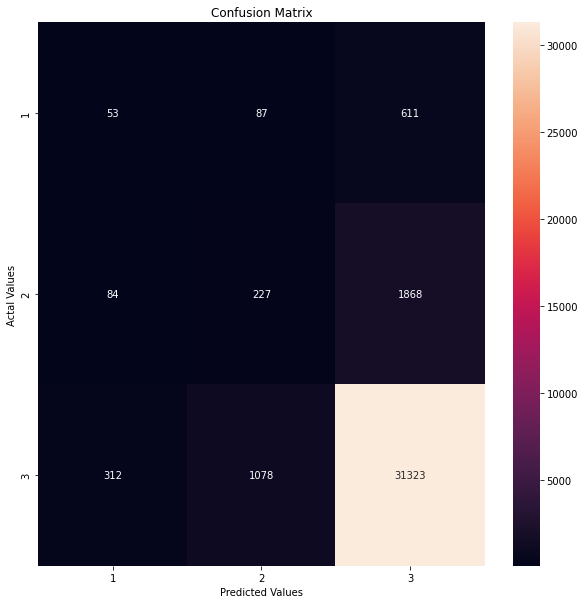

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_test_final, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result_final = classification_report(y_test, ytest_pred)
print(result_final)

              precision    recall  f1-score   support

           1       0.12      0.07      0.09       751
           2       0.16      0.10      0.13      2179
           3       0.93      0.96      0.94     32713

    accuracy                           0.89     35643
   macro avg       0.40      0.38      0.39     35643
weighted avg       0.86      0.89      0.87     35643



En resumen todos los modelos que probamos no tuvieron un desempeño muy bueno. Dado que los datos eran desequilibrados los modelos tuvieron una tendencia de classificar todo como el grupo tres (el grupo mayoritario). Sin embargo, al usar GridSearchCV alcanzamos a mejorar la classificacion de los clases 1 y 2, con aumentos en la precision y recall de ambos, en el modelo final de un Arbol de decision. 

# Classificacion binaria

In [ ]:
# Creacion de variable binaria para target variable. 

# Grupos 1 y 2 se van a classificar como 1 (condicion de pobreza). Grupo 3 se va a classificar como 0 (fuera de sitacion de pobreza)

In [ ]:
y_train_binary = y_train.reset_index().drop(['index'], axis =1)
y_train_binary['pobreza'] = np.where(y_train_binary.reset_index().drop(['index'], axis =1).pobreza.isin([1,2]), 1, 0)
y_train_binary['pobreza'].value_counts()

0    83402
1     7487
Name: pobreza, dtype: int64

In [ ]:
y_val_binary = y_validation.reset_index().drop(['index'], axis =1)
y_val_binary['pobreza'] = np.where(y_val_binary.reset_index().drop(['index'], axis =1).pobreza.isin([1,2]), 1, 0)
y_val_binary['pobreza'].value_counts()

0    14735
1     1305
Name: pobreza, dtype: int64

In [ ]:
y_test_binary = y_test.reset_index().drop(['index'], axis =1)
y_test_binary['pobreza'] = np.where(y_test_binary.reset_index().drop(['index'], axis =1).pobreza.isin([1,2]), 1, 0)
y_test_binary['pobreza'].value_counts()

0    32713
1     2930
Name: pobreza, dtype: int64

# Arbol de decision Binaria



In [ ]:
# se va a usar el modelo final arbol de decison con los mismos parametros (max depth = 20, min_samples_leaf=3, min_samples_split=10)

In [ ]:
arbol_classifier_binary = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
arbol_classifier_binary = arbol_classifier_binary.fit(X_train_one_hot, y_train_binary)

In [ ]:
ypred_binary = arbol_classifier_binary.predict(X_validation_one_hot)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_binary = confusion_matrix(y_val_binary, ypred_binary)
result_binary

array([[14149,   586],
       [ 1096,   209]])

In [ ]:
cm_df_binary = pd.DataFrame(result_binary,
                     index = ['0','1'], 
                     columns = ['0','1'])

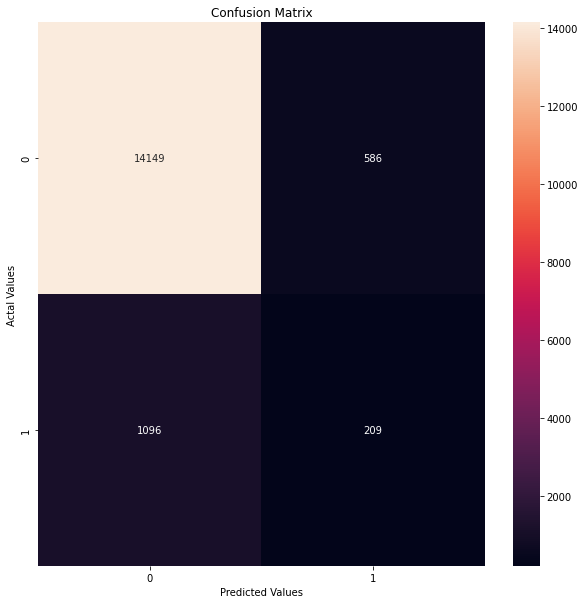

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_binary, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
result_binary = classification_report(y_val_binary, ypred_binary)
print(result_binary)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14735
           1       0.26      0.16      0.20      1305

    accuracy                           0.90     16040
   macro avg       0.60      0.56      0.57     16040
weighted avg       0.87      0.90      0.88     16040



# Umbral de decision

Normalmente en un problema binario el umbral de decision para una observacion es 0.5. Sin embargo esto se puede ajustar. 

En nuestra problema binaria 1 es alguien en situacion de pobreza y 0 es alguien no en una situacion de pobreza. Por lo tanto una classificacion de > 0.5 se classifica como en situacion de pobreza, y < 0.5 se classifica como no en situacion de pobreza. 

Suponiendo que nuestro modelo final se va a usar para determianr a cual personas les dará apoyo social y beneficios sociales. Desde un punto de vista social seria mucho peor clasificar erróneamente alguien que realmente vive en una situacion de pobreza, como alguien normal que no vive en situacion de pobreza, en comparacion con la clasificación errónea  de una persona que no vive en pobreza, como alguien que vive en situación de pobreza. 

Por lo tanto, desde este punto de vista queremos maxamizar el recall (De las personas que realmente viven en situacion de pobreza cuantas fueron predichas bien por el modelo). 

Por otro lado, la precission se trata de cuantas de las personas que el modelo predice que viven en situacion de pobreza realmente viven en pobreza. 

A continuacion dos graficos muestran como el umbral de decision se puede cambiar para maximizar el recall o precision dependiendo del caso. 

In [ ]:
# operating point 
y_scores = arbol_classifier_binary.predict_proba(X_validation_one_hot)[:, 1]
y_scores

array([0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
       0.2       ])

In [ ]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_val_binary, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

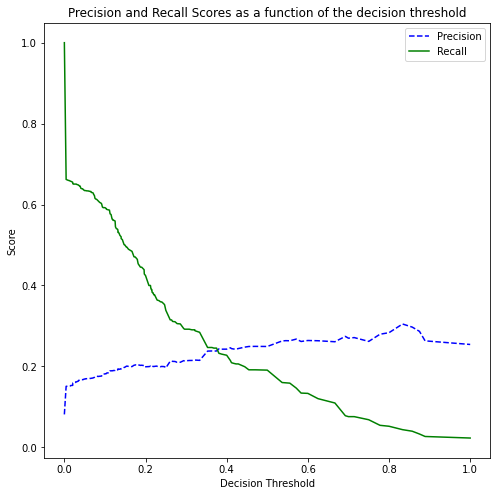

In [ ]:
plot_precision_recall_vs_threshold(p, r, thresholds)

Este grafico expone que a pesar de cambios en el umbral de decisión (decision threshold) la precision apenas aumenta. 

Sin embargo, al reducir el umbral a approx 0.1 el recall aumenta a casi 0.6 que es mucho mejor que el recall de 0.16 dado en el modelo final binario arbol de decision. 

Este punto se expone mas a continuacion con unos matrices de confusion para los y_val_binary vs. los y_scores predichos con el X_validation_one_hot y el modelo arbol_classifier_binary. Cada grafico tienen un diferent umbral de classificacion. 

Se nota que cuando el umbral es 0.1 hay mucho mas classificaciones correctas de clase 1 (situacion de pobreza) - 773 True Positives. Por supesto tambien hay mas clasificaciones erróneas de situacion de pobreza (False Positive = 3487), pero desde un punto de vista social cuando se prioritiza el recall y la classificacion correcta de mas gente en situacion de pobreza esto no importa tanto, con solo 532 false negativos (FN).  

In [ ]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.8):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_val_binary, y_pred_adj),
                       columns=['pred_0', 'pred_1'], 
                       index=['0', '1']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.0, 1.01]);
    plt.xlim([0.0, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

   pred_0  pred_1
0   11248    3487
1     532     773


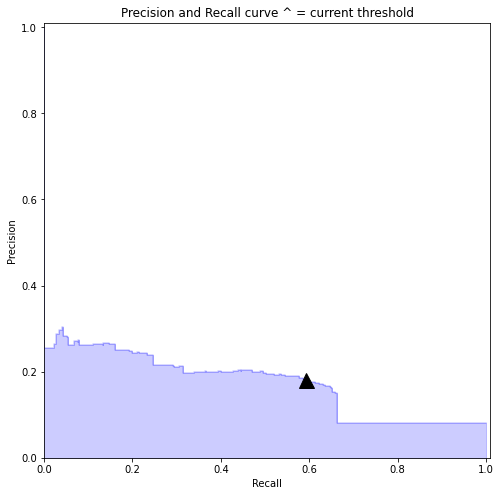

In [ ]:
precision_recall_threshold(p, r, thresholds, 0.1)

   pred_0  pred_1
0   13985     750
1    1056     249


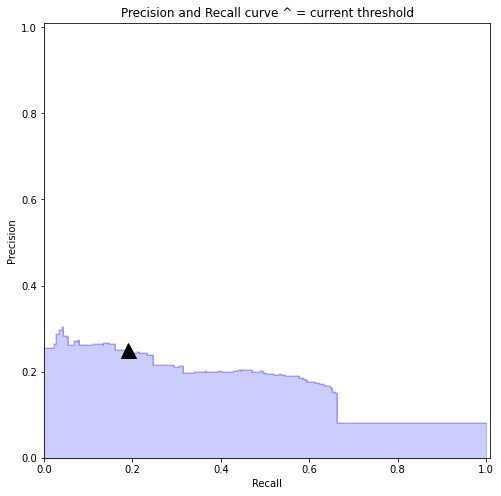

In [ ]:
precision_recall_threshold(p, r, thresholds, 0.5)

   pred_0  pred_1
0   14467     268
1    1206      99


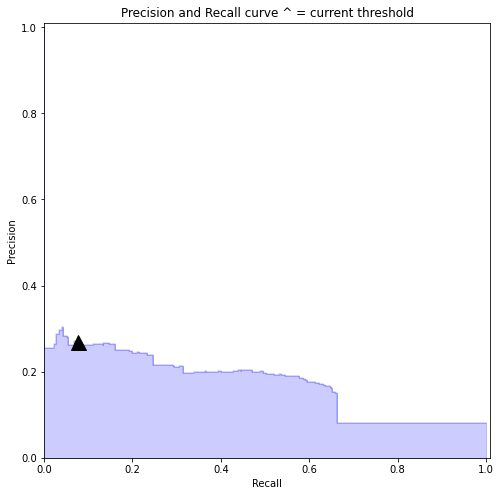

In [ ]:
precision_recall_threshold(p, r, thresholds, 0.7)

Ahora como ultimo paso, se ensayará el modelo de nuevo con el grupo de train pero esta vez con un umbral de decisión  de 0.1. 

In [ ]:
y_scores_test = arbol_classifier_binary.predict_proba(X_test_one_hot)[:, 1]
y_scores_test = pd.DataFrame(y_scores_test)

In [ ]:
y_scores_test['decison_threshold_0.1'] = np.where(y_scores_test >= 0.1, 1, 0)

In [ ]:
y_scores_test['decision_threshold_0.5'] = np.where(y_scores_test[0] >= 0.5, 1, 0)

In [ ]:
y_scores_test

,0,decison_threshold_0.1,decision_threshold_0.5
0,0.14286,1,0
1,0.00000,0,0
2,0.00000,0,0
3,0.00000,0,0
4,0.57143,1,1
...,...,...,...
35638,0.00000,0,0
35639,0.00000,0,0
35640,0.00000,0,0
35641,0.00000,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

result_binary_decision_threshold_0_1 = confusion_matrix(y_test_binary, y_scores_test['decison_threshold_0.1'])
result_binary_decision_threshold_0_1

array([[24928,  7785],
       [ 1256,  1674]])

In [ ]:
cm_df_binary_01 = pd.DataFrame(result_binary_decision_threshold_0_1,
                     index = ['0','1'], 
                     columns = ['0','1'])

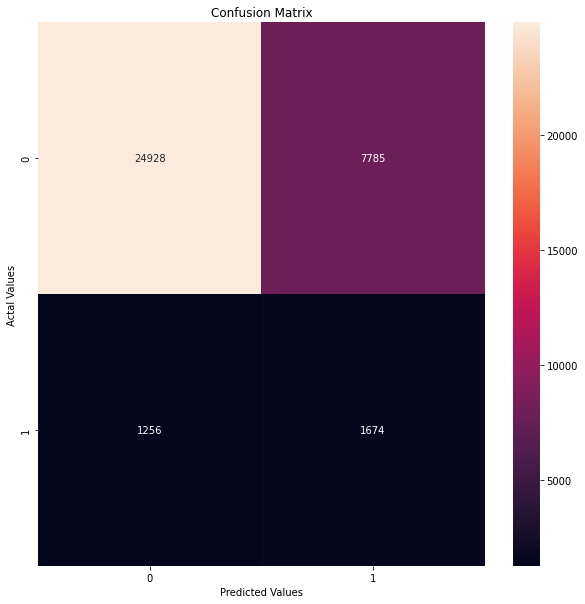

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_binary_01, annot=True, fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#  decison_threshold_0.1

result_binary = classification_report(y_test_binary, y_scores_test['decison_threshold_0.1'])
print(result_binary)

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     32713
           1       0.18      0.57      0.27      2930

    accuracy                           0.75     35643
   macro avg       0.56      0.67      0.56     35643
weighted avg       0.89      0.75      0.80     35643



In [ ]:
# decison_threshold_0.5

result_binary_05 = classification_report(y_test_binary, y_scores_test['decision_threshold_0.5'])
print(result_binary_05)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     32713
           1       0.23      0.17      0.20      2930

    accuracy                           0.88     35643
   macro avg       0.58      0.56      0.57     35643
weighted avg       0.87      0.88      0.88     35643



Como pensamos al usar un umbral de decisión de 0.1 el recall para la clase 1 (pobeza) mejora mucho aumentando a 0.57. Con un umbral de 0.5 el recall para la clase 1 es 0.17. 

Para mejorar este modelo mas, me gustaria volver al paso de exploracion para ver si los missings se podrian tratar de una manera mejor (replzados por la media, mediana, o preidichos con un modelo). 

Tambien me gustaria intentar solucionar el desequilibrio  de clases quizas utilanzdo SMOTE para crear mas observaciones de las clases minoritarias 